
Created on April 20 2024

- **Author**: Dr. Manish Yadav<br>
Cyber-Physical Systems in Mechanical Engineering<br>
Technische Universit ̈at Berlin<br>
Straße des 17. Juni 135<br>
10623 Berlin, Germany<br>
Email: manish.yadav@tu-berlin.de

- This code simulates the results for the manuscript "Evolution Beats Random
Chance: Performance-dependent Network Evolution for Enhanced Computational Capacity"
- Authors: Manish Yadav, Sudeshna Sinha and Merten Stender
- Preprint: https://arxiv.org/abs/2403.15869

# Step 1: Import PDNE_Functions library  

In [177]:
import numpy as np
import time
import PDNE_Functions as PDNE

## Model type and Parameters:
- **N1 model**: Informed_Growth='No', Delete_Nodes = 'No'
- **N2 model**: Informed_Growth='Yes', Delete_Nodes = 'No'
- **N3 model**: Informed_Growth='Yes', Delete_Nodes = 'Yes'

# Step 2: Model Preparation

In [178]:
###### Model preparation ##############################
Informed_Growth = 'Yes'#'No'
Delete_Nodes = 'Yes'#'No'  ##### Informed node deletion with 'Yes' or 'No'
InpNodeType = 0  ###### 0-> New node can be input node for other inputs as well (in multiple tasks) with Prob P_inp, 1-> Strictly exclusive to each task
OutNodeType = 0  ###### 0-> New node can be output node for other outputs as well (in multiple tasks) with Prob P_inp, 1-> Strictly exclusive to each task

##### Model Parameters ##################################
NodesDel_Percent = 50 #25 ##### Least no. of attempts to delete nodes 
Max_AddSteps=25 ##### No. of steps the node addition function attempt, if in all steps no new node is added, t+=1
Net_Init = np.array([[0,1],[1,0]])
### Psi = Prob of in or out connections
### P_inp or P_out is the prob. that a new node is also an input node or not. [0, 1], 0(1)-> No(all) new nodes are inp/out nodes

MaxNewLinks=5; Psi=0.5; Spectral_radius= 1.1
T=500;  #### Max iterations
T_plot=50; RC_Reps=1
NetProps = [NodesDel_Percent, Max_AddSteps, MaxNewLinks, Psi, Spectral_radius]
####### Inputs and tasks###########################################################
P_inp=0.5; P_out= 1 - P_inp; 
#### Scores_Names#################################################################
Scores_Names=['NMSE train', 'NMSE pred']

# Step 3 : Select Task type and Subtype

Train Inp and Out Plot:


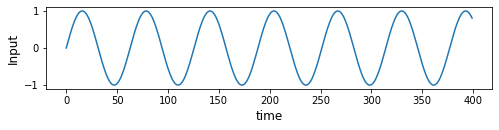

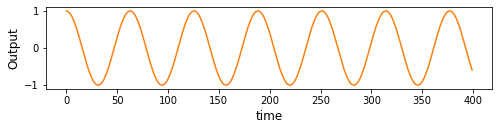

In [186]:
####Select the Task here#########################################################
TaskType = 'SinCos'         ####Choices: 'SinCos' #'Chaos' #'VDP' #'NARMA'

SinCos_SubType = 'SinCos1' ####Choices: 'SinCos1', 'SinCos2'
NARMA_Subtype = 10         #####Choices: 5, 10 or 15
#################################################################################
InpProps=[]
####NARMA Task###################################################################
if TaskType=='NARMA':
    alpha = 0.9
    N_I=1; N_O=1
    InpsNodes_init = list([[0]])
    OutsNodes_init = list([[1]])
    Npts_U = 2500; Transs=500;
    MemoryX = np.array([NARMA_Subtype]); InpDistrib=np.array([[0, 0.5], [0, 0.5]])
    InpProps = [InpDistrib, MemoryX]
    Delta_err= 0.15 #0.105
    ### Desired Error and error precision (rounding off error digits for comparision)
    Err_precision= 6; 
            
####SinCos Task###################################################################
if TaskType=='SinCos':
    alpha = 0.9
    N_I=1; N_O=1
    InpsNodes_init = list([[0]])
    OutsNodes_init = list([[1]])
    Npts_U = 3000; Transs=50;
    h=0.1
    Omegas=np.array([1]); Phis=np.array([0])
    ####SinCos1
    if SinCos_SubType == 'SinCos1':
        A_scs=np.array([0]); B_scs=np.array([1]); P_scs=np.array([1])
        Delta_err= 0.000001 
        Err_precision= 10; 
    ####SinCos2 
    if SinCos_SubType == 'SinCos2':
        A_scs=np.array([1]); B_scs=np.array([0.25]); P_scs=np.array([3])
        Delta_err= 0.001 
        Err_precision= 8; 
    InpProps = [h, Omegas, Phis, A_scs, B_scs, P_scs]
    
####Chaos Task###################################################################   
if TaskType=='Chaos':
    alpha = 0.1
    N_I=3; N_O=3
    InpsNodes_init = list([[0],[0],[0]])
    OutsNodes_init = list([[1],[1],[1]])
    Npts_U = 3000; Transs=50;
    Delta_err= 0.01 #0.001
    ### Desired Error and error precision (rounding off error digits for comparision)
    Err_precision= 6; 
    
####VDP Task###################################################################  
if TaskType=='VDP':
    alpha = 0.23 
    N_I=2; N_O=2
    InpsNodes_init = list([[0],[0]])
    OutsNodes_init = list([[1],[1]])
    Npts_U = 2000; Transs=25;
    Delta_err= 0.005 #0.001
    ### Desired Error and error precision (rounding off error digits for comparision)
    Err_precision= 6; 
######################################################################################  
#### Test Inp_Out Plot
print('Train Inp and Out Plot:')
Inps, Outs, Inps_test, Outs_test = PDNE.InpGenerate(TaskType, N_I, Npts_U, InpProps)
PDNE.InpPlot(Inps, Outs, N_I)
 

# Step 4: Specify model repetitions and Save directory

In [187]:
### Model Repetitions
Model_Reps= 1 #10

######### Save Directory
### for N1
SaveDir = 'C:/Work/TU-Berlin/Projects/2.RC_DynamicNets/1.NetGrowth_Models/Data/Checkpoint-Model_V3/1Task/N1/SinCos/'
### for N2
# SaveDir = 'C:/Work/TU-Berlin/Projects/2.RC_DynamicNets/1.NetGrowth_Models/Data/Checkpoint-Model_V3/1Task/N2/SinCos/'
# ### for N3
# SaveDir = 'C:/Work/TU-Berlin/Projects/2.RC_DynamicNets/1.NetGrowth_Models/Data/Checkpoint-Model_V3/1Task/N3/SinCos/'

####if you want to save data give 'Yes'
SaveDataFlag="No"

# Step 5: Run the Network Evolution

Model rep:  0


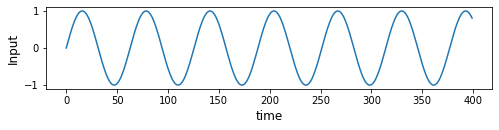

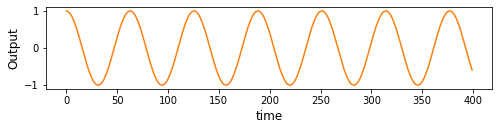

0 After Delete 1 Fun : Updated Net. Nodes: 2 Links: 2 Inp Nodes: 1 Out nodes: 1 Deleted Nodes: 0 Err: [0.99993677]
1 After Addition fun: Updated Net. Nodes: 3 Links: 5 Inp Nodes: 2 Out nodes: 1 Err: [0.99989189]


C:\Work\TU-Berlin\Projects\2.RC_DynamicNets\1.NetGrowth_Models\GitHub_Repo\PDNE_Functions.py:51: RuntimeWarning: divide by zero encountered in divide
  ResMat = Gn*Spectral_radius/Spectral_radius_Gn


1 After Delete 1 Fun : Updated Net. Nodes: 3 Links: 5 Inp Nodes: 2 Out nodes: 1 Deleted Nodes: 0 Err: [0.99989189]
2 After Addition fun: Updated Net. Nodes: 4 Links: 9 Inp Nodes: 2 Out nodes: 2 Err: [0.69664664]
3 After Delete 1 Fun : Updated Net. Nodes: 3 Links: 4 Inp Nodes: 1 Out nodes: 2 Deleted Nodes: 1 Err: [0.65281075]
4 After Addition fun: Updated Net. Nodes: 4 Links: 5 Inp Nodes: 2 Out nodes: 2 Err: [0.6512969]
4 After Delete 1 Fun : Updated Net. Nodes: 4 Links: 5 Inp Nodes: 2 Out nodes: 2 Deleted Nodes: 0 Err: [0.6512969]
5 After Addition fun: Updated Net. Nodes: 5 Links: 10 Inp Nodes: 3 Out nodes: 3 Err: [0.00211027]
5 After Delete 1 Fun : Updated Net. Nodes: 5 Links: 10 Inp Nodes: 3 Out nodes: 3 Deleted Nodes: 0 Err: [0.00211027]
6 After Addition fun: Updated Net. Nodes: 6 Links: 12 Inp Nodes: 3 Out nodes: 4 Err: [0.00020271]
6 After Delete 1 Fun : Updated Net. Nodes: 6 Links: 12 Inp Nodes: 3 Out nodes: 4 Deleted Nodes: 0 Err: [0.00020271]
7 After Addition fun: Updated Net. 

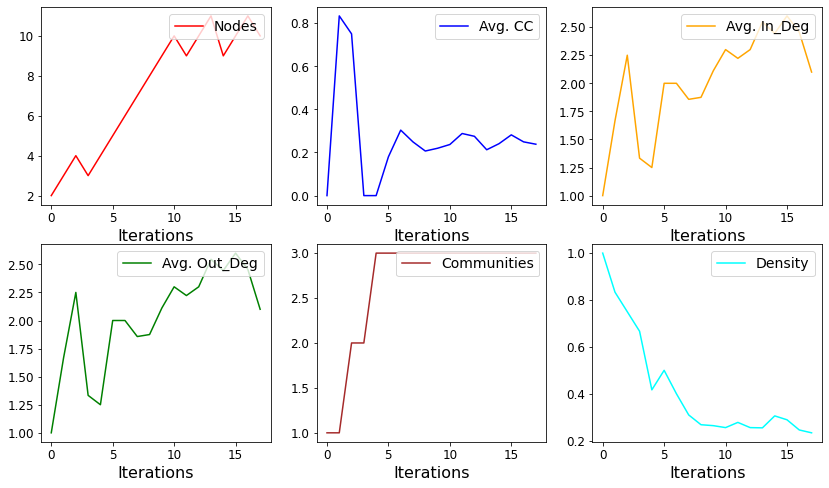

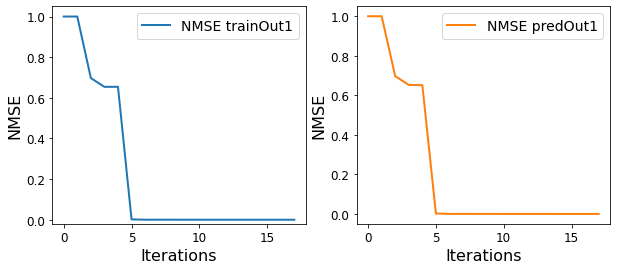

Final Evolved Network:


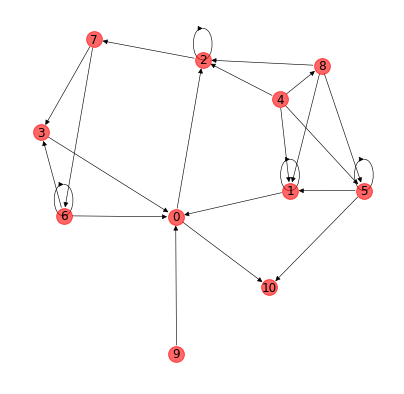

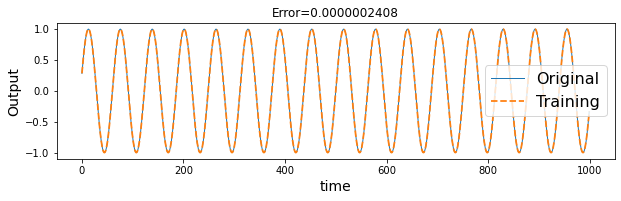

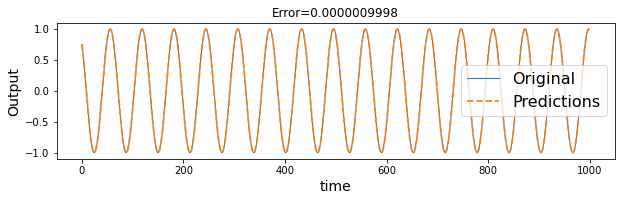

Run time 23.98300337791443 seconds.


In [188]:
########### Run Model##################################
start = time.time()

PDNE.Run_Full_Model(Net_Init, alpha, Npts_U, TaskType, NetProps, InpProps, MaxNewLinks, Psi, P_inp,\
    P_out, N_I, N_O, InpsNodes_init, OutsNodes_init, Spectral_radius, T, Delta_err, T_plot,\
    Transs, RC_Reps, Err_precision, Max_AddSteps, NodesDel_Percent, Informed_Growth, Delete_Nodes,\
    InpNodeType, OutNodeType, Model_Reps, Scores_Names, SaveDir, SaveDataFlag)

print('Run time', time.time()-start, 'seconds.')